In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Desktop/loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


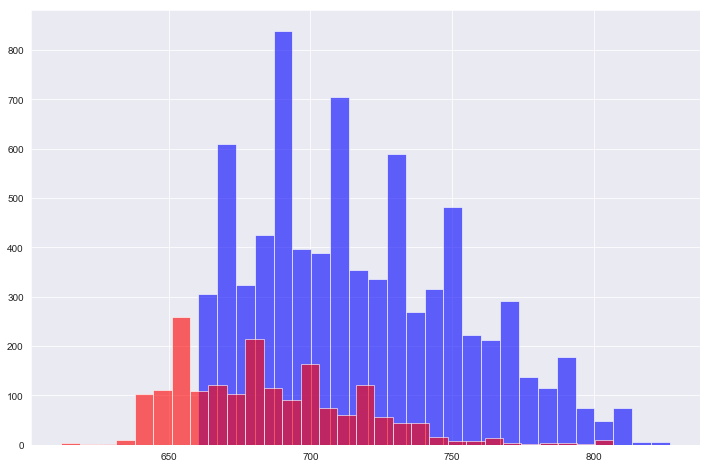

In [15]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
df[df['credit.policy']==1]['fico'].hist(bins=30,color='blue',label='Credit Policy=1',alpha=0.6)
df[df['credit.policy']==0]['fico'].hist(bins=30,color='red',label='Credit Policy=0',alpha=0.6)

Text(0.5,1,'Paid Loans VS Unpaid Loans')

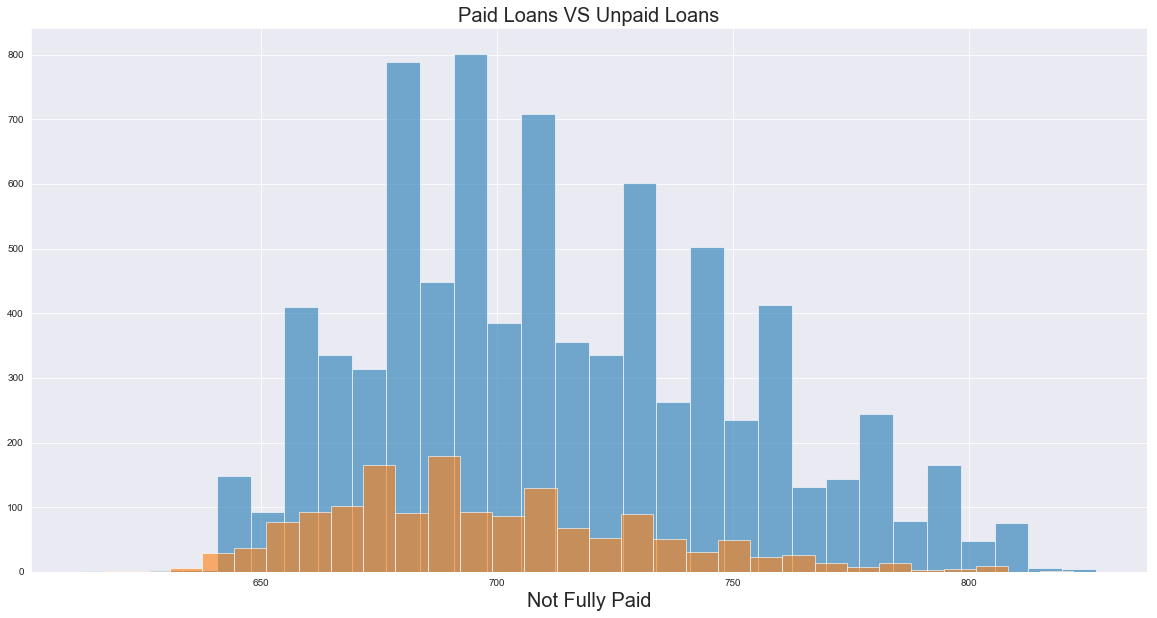

In [22]:
plt.figure(figsize=(20,10))
df[df['not.fully.paid']==0]['fico'].hist(bins=30,alpha=0.6)
df[df['not.fully.paid']==1]['fico'].hist(bins=30,alpha=0.6)
plt.xlabel('Not Fully Paid',fontsize=20)
plt.title('Paid Loans VS Unpaid Loans',fontsize=20)

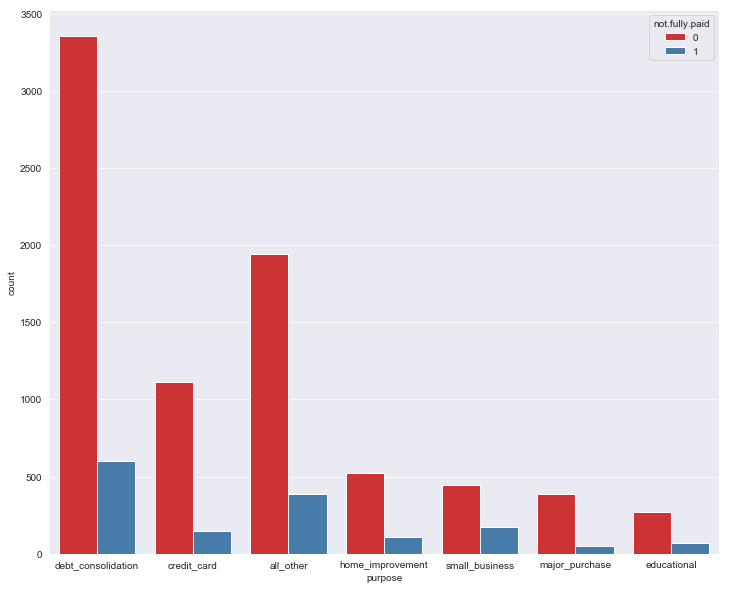

In [29]:
plt.figure(figsize=(12,10))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1800x720 with 0 Axes>

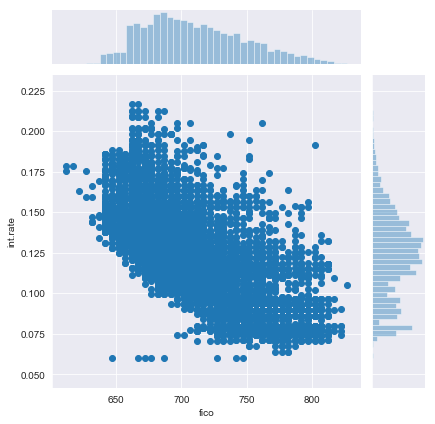

In [35]:
plt.figure(figsize=(25,10))
sns.jointplot(x='fico',y='int.rate',data=df)


C:\Users\Gwenn\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Gwenn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


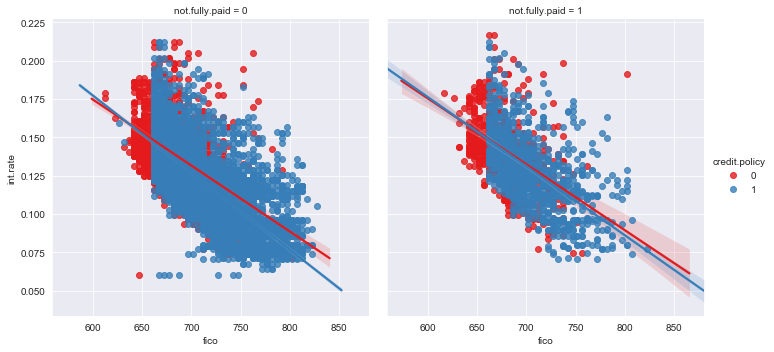

In [43]:

sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1',size=5)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [48]:
cat_feat=['purpose']

In [49]:
final_data=pd.get_dummies(df,columns=cat_feat,drop_first=True)

In [50]:
final_data.head(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
5,1,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,1,0,0,0,0,0
6,1,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,0,1,0,0,0,0
7,1,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,0,0,0,0,0,0
8,1,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,0,0,0,1,0,0
9,1,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,0,1,0,0,0,0


In [52]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [53]:
tree=DecisionTreeClassifier()

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [57]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
pred=tree.predict(X_test)

In [61]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print('Confusion Matrix:' '\n' '\n',metrics.confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:' '\n' '\n',metrics.classification_report(y_test,pred))


Confusion Matrix:

 [[2003  391]
 [ 364  116]]


Classification Report:

              precision    recall  f1-score   support

          0       0.85      0.84      0.84      2394
          1       0.23      0.24      0.24       480

avg / total       0.74      0.74      0.74      2874



In [66]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfc=RandomForestClassifier(n_estimators=200)

In [74]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
pred=rfc.predict(X_test)

In [76]:
print('Confusion Matrix:' '\n' '\n',metrics.confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:' '\n' '\n',metrics.classification_report(y_test,pred))

Confusion Matrix:

 [[2390    4]
 [ 470   10]]


Classification Report:

              precision    recall  f1-score   support

          0       0.84      1.00      0.91      2394
          1       0.71      0.02      0.04       480

avg / total       0.82      0.84      0.76      2874



In [1]:
df.corrwith(df['installment'])

NameError: name 'df' is not defined